70. 爬楼梯
---
有n级台阶，每次有两种方法上楼（一次上一节/一次上两节）。问：有多少种方案？

https://leetcode-cn.com/problems/climbing-stairs/

```
输入： 3
输出： 3
解释： 有三种方法可以爬到楼顶。
1.  1 阶 + 1 阶 + 1 阶
2.  1 阶 + 2 阶
3.  2 阶 + 1 阶
```
### 解题思路
动态规划：
一个问题的最优解，可以从其子集的最优解组合而得。

1. 第i级台阶的方法总数=（i-1）级台阶方法总数 + （i-2）级台阶方法总数
2. 例外：n<=2 时，排除掉即可。

* 时间复杂度：O（n）

* 空间复杂度：O（n），需要长度为n的数组。
### 代码

```python
class Solution(object):
    def climbStairs(self, n):
        if n == 1:
            return 1
        if n == 2:
            return 2
        first = 1
        second = 2
        res = 0 
        for i in range(2,n):
            res = first + second
            first = second
            second = res
        return res
```

198. 打家劫舍
---
链接：https://leetcode-cn.com/problems/house-robber/

有k间房，只能隔一间偷一个。问你能偷到的最大金额。

example：
```
输入: [2,7,9,3,1]
输出: 12
解释: 偷窃 1 号房屋 (金额 = 2), 偷窃 3 号房屋 (金额 = 9)，接着偷窃 5 号房屋 (金额 = 1)。
     偷窃到的最高金额 = 2 + 9 + 1 = 12 。
```

### 解题思路
动态规划：
* 定义子问题
* 写出子问题的递推关系
* 确定 DP 数组的计算顺序
* 空间优化（可选）


1. 定义子问题：
    * 有k间房，用f（k）表示k与k之前偷窃到的最高金额。
    * 隔一间偷一间：如果偷了k，则不能偷k-1。


2. 子问题的递推关系:
    * 只有一间房时(k=1),f(1)=A(1)
    * k = 2 时，对比A(1)与A(2)的最大值。f(2)=max(A(1),A(2))
    * k = 3 时，对比f(3) = max(f(1)+A(3),f(2))
    * 以此类推，k间房，每间房的金额为nums[0],nums[1].....nums[k-1]，f(k) = max(f(k-2)+nums[k-1],f(k-1))
    * 因为列表是从0开始索引，而房间号是从1开始索引，为了便于理解，在开头添加一个dp[0]=0,表示一间没偷时，金额总数为0。
        

3. 确定顺序：
    * 从下到上
    
### 代码

```python
class Solution(object):
    def rob(self, nums):
        N = len(nums)
        if N == 0:
            return 0
        dp = [0]*(N+1)
        dp[0] = 0
        dp[1] = nums[0]
        for i in range(2,N+1):
            dp[i] = max(dp[i-2]+nums[i-1],dp[i-1])
        return dp[N]
```

### 因为dp[n]仅与dp[n-2]&dp[n-1]有关，可以使用old,new更新
* 空间复杂度为：O(1)
* new,old = max(old+num,new),new 这里old更新的为new的输入值而非输出值。

```
class Solution:
    def rob(self, nums: List[int]) -> int:
        old,new = 0,0
        for num in nums:
            new,old = max(old+num,new),new
        return new
```

213. 打家劫舍 II
---
链接：https://leetcode-cn.com/problems/house-robber-ii/

有k间房，最后一间和第一间相连，只能隔一间偷一个。问你能偷到的最大金额。

### 解题思路
* 同198题，难点在于此题将收尾相连成为环状排列。
* 题目要求：第一个房子和最后一个房子不能一起偷。即首尾不能同时存在。
* 解决方法：拆环，将环装排列拆成两个单排，最后比较两个单排的大小。
    * 偷第一个房子，列表变更为num[:-1]
    * 偷最后一个房子，列表变更为num[1:]
其他同T198
* 时间复杂度：O(n)
* 空间复杂度：O(n)

### 代码

```python
class Solution(object):
    def rob(self, num):
        if len(num) == 1:
            return num[0]
        def result(nums):
            N = len(nums)
            if N == 0:
                return 0
            dp = [0]*(N+1)
            dp[0] = 0
            dp[1] = nums[0]
            for i in range(2,N+1):
                dp[i] = max(dp[i-2]+nums[i-1],dp[i-1])
            return dp[N]
        return(max(result(num[1:]),result(num[:-1])))
```

### 因为dp[n]仅与dp[n-2]&dp[n-1]有关，可以使用old,new更新
* 空间复杂度为：O(1)
### 代码
```
class Solution:
    def rob(self, nums: List[int]) -> int:
        if len(nums) == 1:
            return nums[0]
        def result(num):
            old,new = 0,0
            for nums in num:
                new,old = max(old+nums,new),new
            return(new)
        return(max(result(nums[1:]),result(nums[:-1])))
```

64. 最小路径和
---
链接：https://leetcode-cn.com/problems/minimum-path-sum/

给定非负整数的m x n网络,找到从（0,0）到（m-1,n-1）的最小路径和（从左上走到右下经过的所有数字和）

example：
```
输入:
[
  [1,3,1],
  [1,5,1],
  [4,2,1]
]
输出: 7
解释: 因为路径 1→3→1→1→1 的总和最小。
```

### 解题思路
这是一道二维的动态规划题，化二维为一维就思考每条路的走法：
* 构造一个与grid尺寸相同的dp二维列表。
* 自左上向右下，用dp[i][j]代表到达grip[i][j]的最小和，有两条路线可以到达（i,j），从左边(i-1，j)和上边(i,j-1)
* 用min（）函数比较两条线路的最小即可，注意排除边界情况。
* 时间复杂度：O（mn）
* 空间复杂度：O（mn）
### 代码

```python
class Solution(object):
    def minPathSum(self, grid):
        #利用dp构造一个新的网络用于储存
        m = len(grid)
        n = len(grid[0])
        dp = [[0]*n for i in range(m)]
        dp[0][0] = grid[0][0]
        for i in range(m):
            for j in range(n):
                if i == j == 0:
                    continue
                elif i == 0:
                    dp[0][j] = grid[0][j] + dp[0][j-1]
                elif j == 0:
                    dp[i][0] = grid[i][0] + dp[i-1][0]
                else:
                    dp[i][j] = grid[i][j] + min(dp[i-1][j],dp[i][j-1])
        return dp[m-1][n-1]
```
### 因只与(i-1,j),(i,j-1)有关，所以可以不用构造dp，直接在原列表中更新
* 时间复杂度：O（mn）
* 空间复杂度：O（1）

```
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        m = len(grid)
        n = len(grid[0])
        for i in range(m):
            for j in range(n):
                if i==j==0:
                    continue
                elif i==0:
                    grid[i][j] = grid[0][j-1] + grid[i][j]
                elif j==0:
                    grid[i][j] = grid[i-1][0] + grid[i][j]
                else:
                    grid[i][j] = min(grid[i-1][j],grid[i][j-1]) + grid[i][j]
        return(grid[-1][-1])
```

## 62. 不同路径
---
链接：https://leetcode-cn.com/problems/unique-paths/

m * n大小的方格，从左上角走到右下角的路径总数。
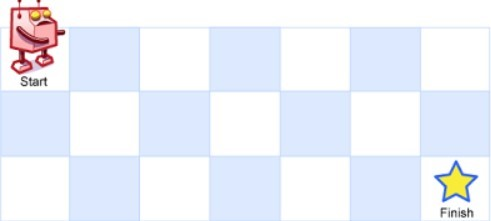

### 解题思路
动态规划
题目要求总路径，那就设dp[i][j]为到达[i][j]位置的总路径数，那么dp[i][j]=dp[i-1][j]+dp[i][j-1]
* 时间复杂度：O(m*n)
* 空间复杂度：O(m*n)

### 代码

```python
class Solution(object):
    def uniquePaths(self, m, n):
        dp = [[0]*m for _ in range(n)]
        for i in range(n):
            for j in range(m):
                if i == 0 or j == 0:
                    dp[i][j] = 1
                else:
                    dp[i][j] = dp[i-1][j] + dp[i][j-1]
        return(dp[n-1][m-1])
```

## 303. 区域和检索 - 数组不可变
---
链接：https://leetcode-cn.com/problems/range-sum-query-immutable

给定一个整数数组nums，求出数组从索引i到j(i≤j)范围内元素的总和，包含i,j两点。

example：
```
给定 nums = [-2, 0, 3, -5, 2, -1]，求和函数为 sumRange()
sumRange(0, 2) -> 1
sumRange(2, 5) -> -1
sumRange(0, 5) -> -3
```

### 解题思路
动态规划 要求总和，就令dp[i]代表i和i以前的数据和。
* 计算i~j的和就是dp[j]-dp[i-1]。为了避免i-1超出范围，改为，dp[j]-dp[i]+nums[i]。
* 要调用nums和dp。需要使用self.nums&self.dp
* 时间复杂度：O(n)
* 空间复杂度：O(n)

### 代码

```
python
class NumArray(object):

    def __init__(self, nums):
        self.nums = nums
        n = len(nums)
        dp = [0]*n
        sum = 0
        for i in range(n):
            sum += nums[i]
            dp[i] = sum
        self.dp = dp

    def sumRange(self, i, j):
        return(self.dp[j]-self.dp[i]+self.nums[i])
```

## 413. 等差数列划分
---
链接：https://leetcode-cn.com/problems/arithmetic-slices/

如果一个数列大于等于3个数，且两两差值相等，则称为等差数列。问一个任意数列有多少等差数列。

example:
```
A = [1, 2, 3, 4]

返回: 3, A 中有三个子等差数组: [1, 2, 3], [2, 3, 4] 以及自身 [1, 2, 3, 4]
```

### 解题思路
1. 动态规划：题目要求所有等差数列个数，设dp[i]表示以i位置结尾的等差数列数量（官方解答其实就是这个意思）
2. 那么整个数组A的等差数组个数就为sum[dp]

### 代码

```python
class Solution(object):
    def numberOfArithmeticSlices(self, A):
        #以dp[i]表示到达i位置时的等差数列总和
        n = len(A)
        if n<3:
            return 0
        dp = [0]*n
        for i in range(2,n):
            if A[i-2]+A[i] == A[i-1]*2:
                dp[i] = dp[i-1]+1
        return sum(dp)
```

## 343. 整数拆分
---
链接：
https://leetcode-cn.com/problems/integer-break/

将整数n拆分成多个整数，求拆分后的最大乘积。

example:
```
输入: 10
输出: 36
解释: 10 = 3 + 3 + 4, 3 × 3 × 4 = 36。
```

### 解题思路
1. 动态规划：求整数n时的最大乘积，则设dp[i]为i时的最大乘积。最后输出dp[n]
2. 为什么能用动态规划？
    * n=1,dp[1]=1
    * n=2,dp[2]=1
    * n=3,dp[3]=max(1x(3-1),2*(3-2))=max(1x(dp[2],(3-1)),2x(dp[1],(3-2)))
    * n=k,dp[k]=max(1x(k-1),2x(k-2),,,(k-1)x(k-(k-1))))=max(1x(dp[k-1],(k-1)),2x(dp[k-2],(k-2)),,,,(k-1)x(dp[1],1))
3. 由递推可得，dp[i]=max(j*dp[i-j],j*(i-j),dp[i])。
4. 为什么有j*(i-j)?
    * 因为dp[i-j]的结果中无(i-j)，只有1*（i-j-1）

### 代码

```python
class Solution(object):
    def integerBreak(self, n):
        dp = [0]*(n+1)
        dp[1] = 1
        for i in range(2,n+1):
            for j in range(1,i):
                dp[i] = max(j*dp[i-j],j*(i-j),dp[i])
        return dp[n]
```

## 279. 完全平方数
---
链接：https://leetcode-cn.com/problems/perfect-squares/

给定正整数 n，找到若干个完全平方数（比如 1, 4, 9, 16, ...）使得它们的和等于 n。找到最小的完全平方数组合，可以重复使用。

example:
```
输入: n = 13
输出: 2
解释: 13 = 4 + 9
```

### 解题思路
1. 动态规划：因为要求完全平方数个数最少，设i的最少完全平方数为dp[i],用j表示完全平方数。那么dp[i]=dp[i-j]+1，因此可以使用动态规划。
2. 问题的关键是n是由哪几个完全平方数组成最小，比如12：可以是dp[8]+dp[4]，也可以是dp[3]+dp[9],用square构建完全平方数列表，用j在里面循环输出dp[i]最小值。
### 代码

```python
class Solution(object):
    def numSquares(self, n):
        dp = [float('inf')]*(n+1)
        dp[0] = 0
        square = [i**2 for i in range(int(math.sqrt(n))+1)]
        for i in range(1,n+1):
            for j in square:
                if i < j:
                    break
                else:
                    dp[i] = min(dp[i],dp[i-j]+1)
        return dp[n]
```

## 300. 最长上升子序列
---
链接：https://leetcode-cn.com/problems/longest-increasing-subsequence/

给定一个无序的整数数组，求其中最长递增子序列的长度。可以跳序组合子序列

example：
```
输入: [10,9,2,5,3,7,101,18]
输出: 4 
解释: 最长的上升子序列是 [2,3,7,101]，它的长度是 4。
```

### 解题思路
* 本题难点：子序列可以跳序组合的，用dp[i]=dp[j]+1解决，具体如下：
* 时间复杂度：O（n^2），i，j两个循环
* 空间复杂度：O(n)，需要长度为n的dp


1. 动态规划:用dp[i]表示s[i]为结尾的最长子序列长度
2. 找到[:i]中s[j]小于s[i]的最长子序列dp[j]，长度+1即可。用dp[i]来缓存最长结果，直到小循环j结束。
3. 最后输出整个序列中的最大值即可 max(dp[i] for i in range(n))

### 代码

```python
class Solution(object):
    def lengthOfLIS(self, nums):
        #因要求最长递增子序列的长度，那么dp[i]就为以i结尾的最长递增序列长度
        n = len(nums)
        if n == 0:
            return 0
        dp=[1]*n
        #对于s[i],因为可以跳序组合，所以需要j重新遍历s[:i+1]来找到dp[i],只要s[i]>s[j],dp[i]=dp[j]+1
        for i in range(1,n):
            for j in range(i):
                if nums[i]>nums[j]:
                    dp[i] = max(dp[i],dp[j]+1)
        return max(dp[i] for i in range(n))
```

## 646. 最长数对链
---
链接：https://leetcode-cn.com/problems/maximum-length-of-pair-chain/

列表pairs由n个数对构成。数对由两个数组成，且第一位小于第二位。对于[[a,b],[c,d]]，若b<c,则可组成数对链。求最长数对链长度

example：
```
输入: [[1,2], [2,3], [3,4]]
输出: 2
解释: 最长的数对链是 [1,2],[3,4]
```

### 解题思路
* 本题难点：数对是无序的需要排序，其他同[第300题]()
* 时间复杂度:O(n^2)，有i,j两个最长为n的循环
* 空间复杂度:O(n),长度为n的dp


1. 动态规划：用dp[i]表示第i位时的最长对数链。
2. j在[:i]中小循环，只要dp[i]的第一位大于dp[j]的第二位，对链长度就可以增加，用dp[i]来做缓存。
3. 最后输出max dp[i]即可

### 代码

```python
class Solution(object):
    def findLongestChain(self, pairs):
        n = len(pairs)
        dp = [1]*n
        #先将数对以0位进行排序
        pairs.sort(key=lambda x:x[0])
        #dp[i]表示第i对的最长数对链
        for i in range(1,n):
            for j in range(i):
                if pairs[i][0]>pairs[j][1]:
                    dp[i]=max(dp[i],dp[j]+1)
        return max(dp[i] for i in range(n))
```

# 背包问题
背包问题实际上也只是动态规划中的一类
1. 题目求什么，dp含义就是什么
2. 背包问题中dp[i][j]是由dp[i-1][?]决定的
3. ？代表如何使用nums[i]可以达到dp[i][j]。状态转移方程通过思考这一步得出。

## 1143. 最长公共子序列
---
链接：https://leetcode-cn.com/problems/longest-common-subsequence/

两个字符串text1&text2。求最长公共子序列长度（LCS）

example:
```
输入：text1 = "abcde", text2 = "ace" 
输出：3  
解释：最长公共子序列是 "ace"，它的长度为 3。
```

### 解题思路
* 最长公共子序列（lcs）是一道二维动态规划问题，难点在于有两个变量i,j在同时变化，不好理解与思考状态转移方程。
* 解决方法，思考时，把二维想成一维，即固定text1的i，让j去text1[:i]&text2中找最长公共子序列。
* text1[i]=text2[j]时，dp[i][j]=dp[i-1][j-1]+1
* text1[i]!=text2[j]时，就要比较最大值是在text1[:i]中，还是text[:i-1]中，dp[i][j]=max(dp[i-1][j],dp[i][j-1])
* 状态转移方程：
![image.png](https://pic.leetcode-cn.com/f25ddd4af8304e5aa9bb0c724fba79002e52831bbe203135f5ea715f41c92510-image.png)
* 时间复杂度：O(m*n)，两个循环
* 空间复杂度：O(m*n)，dp是(m,n)大小 
![image.png](https://pic.leetcode-cn.com/a4c904c8203e817886db01c6c528ff085675670621ed82ecc85a996c48522186-image.png)

### 代码

```python
class Solution(object):
    def longestCommonSubsequence(self, text1, text2):
        n,m = len(text1),len(text2)
        dp = [[0]*(m+1) for _ in range(n+1)]

        for i in range(1,n+1):
            for j in range(1,m+1):
                if text1[i-1]==text2[j-1]:
                    dp[i][j]=dp[i-1][j-1]+1
                else:
                    dp[i][j]=max(dp[i-1][j],dp[i][j-1])
        return(dp[n][m])
```

## 416. 分割等和子集
---
链接：https://leetcode-cn.com/problems/partition-equal-subset-sum/

能否整分正数组

example：
```
输入: [1, 5, 11, 5]

输出: true

解释: 数组可以分割成 [1, 5, 5] 和 [11]
```

### 解题思路
动态规划 + 01背包问题

1. dp[i][j]表示：[0:i]中的数，是否存在和为j，最终dp[-1][-1]为即表示是否存在和为sum/2
2. 01背包问题理解时把所有情况的图画出来即可。借鉴这个[大哥的图](https://leetcode-cn.com/problems/partition-equal-subset-sum/solution/0-1-bei-bao-wen-ti-xiang-jie-zhen-dui-ben-ti-de-yo/)

![77838706e514294db6eb703b11a44a43b3524498dadcf0870b014268af6f8783-image.png](https://pic.leetcode-cn.com/ee5b2c4ad9c0d8dfaf62dd94898feff42414e20b09297d4800551e57af3118ae-77838706e514294db6eb703b11a44a43b3524498dadcf0870b014268af6f8783-image.png)

3. 思路看这个[大哥](https://leetcode-cn.com/problems/partition-equal-subset-sum/solution/pythondong-tai-gui-hua-jian-ji-suan-fa-by-fei-ben-/)

### 代码

```python
class Solution(object):
    def canPartition(self, nums):
        sums,n = sum(nums),len(nums)
        if sums % 2 == 1:
            return False
        target = sums/2
        dp = [[False]*(target+1) for _ in range(n)]
        nums.sort()
        for i in range(n):
            for j in range(nums[i],target+1):
                if nums[i]==j:
                    dp[i][j]=True
                else:
                    dp[i][j]=dp[i-1][j] or dp[i-1][j-nums[i]]
        return dp[-1][-1]
```

## 494.目标和
---
链接：https://leetcode-cn.com/problems/target-sum/

数组nums为非负整数组，每个使用一次，通过在数前添加+/-号使结果为S，求方法数量

example：
```
输入: nums: [1, 1, 1, 1, 1], S: 3
输出: 5
解释: 
-1+1+1+1+1 = 3
+1-1+1+1+1 = 3
+1+1-1+1+1 = 3
+1+1+1-1+1 = 3
+1+1+1+1-1 = 3
一共有5种方法让最终目标和为3。
```

### 解题思路
1. 思路参考来源于[解答](https://leetcode-cn.com/problems/target-sum/solution/dong-tai-gui-hua-si-kao-quan-guo-cheng-by-keepal/)
2. 动态规划：题意求方法数，所以dp[i][j]表示从0-i数组中可以通过加减得到结果j的方法数量
3. 状态转移方程：
    * 对于j如果nums[i]使用+号，则dp[i][j]=dp[i-1][j-nums[i]]=r的方法数量
    * 对于j如果nums[i]使用-号，则dp[i][j]=dp[i-1][j+nums[i]]=l的方法数量
    * 所以综上，dp[i][j]方法总数为l+r,即：
    * dp[i][j] = dp[i-1][j-nums[i]]+dp[i-1][j+nums[i]]
4. 目标位置:dp[n-1][sums+S]

### 代码

```python
class Solution(object):
    def findTargetSumWays(self, nums, S):
        n = len(nums)
        sums = sum(nums)
        if sums<S:
            return 0
        dp = [[0]*(2*sums+1) for _ in range(n)]
        #第一行初始化,需要注意的是+,-有可能指向同一个数，所以使用叠加+=1而不是赋值=1
        dp[0][sums-nums[0]]+=1
        dp[0][sums+nums[0]]+=1
        for i in range(1,n):
            for j in range(2*sums+1):
                l = dp[i-1][j-nums[i]] if 0<=j-nums[i]<(2*sums+1) else 0
                r = dp[i-1][j+nums[i]] if 0<=j+nums[i]<(2*sums+1) else 0
                dp[i][j] = l + r
        return dp[n-1][sums+S]
```

## 474.一和零
---
有m个0，n个1，和k个字符串，求最多能拼出多少个字符串。

链接：https://leetcode-cn.com/problems/ones-and-zeroes/

example：
```
输入: Array = {"10", "0001", "111001", "1", "0"}, m = 5, n = 3
输出: 4
解释: 总共 4 个字符串可以通过 5 个 0 和 3 个 1 拼出，即 "10","0001","1","0" 。
```

### 解题思路
两个背包，0背包和1背包，字符串会占用两个背包的空间，受益是1。
1. 动态规划：求能拼出字符串最大数量，所以dp[i][j]就为在当前字符串，用i个0，j个1能拼出字符串的最大个数
2. 状态转移方程：dp[k][i][j]=max(dp[k-1][i][j],1+dp[k-1][i-count_0[k]][j-count_1[k]]),k表示第k个字符串，count_0[k]为k字符串需要的0数量。
3. 状态转移方程优化：
    * 因dp[k][i][j]仅与dp[k-1]有关，故优化为2维如下：
        dp[i][j]=max(dp[i][j],1+dp[i-count_0][j-count_1])
    * i,j遍历需逆序,以i为例子：for i in range(m,count_0 -1,-1):
        1. [逆序原因](https://blog.csdn.net/xiajiawei0206/article/details/19933781?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase)：如若正序,dp[i][j]迭代的是dp[k][i][j]而非dp[k-1][i][j],反向不存在这个问题。
        2. 在count_0处截止原因：小于count_0时，i-count_0<0,out of range且没意义。
4. 时间复杂度：O(m*n*k)
5. 空间复杂度：O(m*n)

### 代码

```python
class Solution(object):
    def findMaxForm(self, strs, m, n):
        dp=[[0]*(n+1) for _ in range(m+1)]
        for item in strs:
            count_0 = item.count("0")
            count_1 = item.count("1")
            for i in range(m,count_0 -1,-1):
                for j in range(n,count_1 -1,-1):
                    dp[i][j] = max(dp[i][j],1+dp[i-count_0][j-count_1])
        return dp[m][n]
```

## 322.零钱兑换
---
链接：https://leetcode-cn.com/problems/coin-change/

多种面额硬币coins，每种不限数量，组成总金额amount。求所需最小硬币数。

example：
```
输入: coins = [1, 2, 5], amount = 11
输出: 3 
解释: 11 = 5 + 5 + 1
```

### 解题思路
#### 1. 动态规划：
求用coins使用数量最小值，那就设dp[i][j]代表使用[0,i]个币种组成j的最小数量。
![T322.jpg](https://pic.leetcode-cn.com/45c79c39728b812907862f8950bd0c1dd9a7d611f280ba4b9e5a8c93703cd0c7-T322.jpg)

#### 2. 状态转移方程：

dp[i][j]=min(dp[i-1][j],1+dp[i-1][j-coins[i],1+dp[i][j-coins[i]]])
* dp[i-1][j]:不使用coins[i]。
* 1+dp[i-1][j-coins[i]]:使用coins[i]，且j-coins[i]在i-1处取得最小
* 1+dp[i][j-coins[i]]: 使用coins[i]，且j-coins[i]在i处取得最小

#### 3. 优化：
对于2.2,2.3如果对coins从小到大排序，则j-coins[i]只会出现在i处,即：

dp[i][j]=min(dp[i-1][j],1+dp[i][j-coins[i]])
   * 在(0,coins[i])区间，因为j-coins[i]<0,所以最小值dp[i][j]就是dp[i-1][j]的值.
   * 因为dp[i][j]只与dp[i-1]&dp[i]有关，且这里的dp[i-1]行与dp[i]行值相等。所以j采用顺序遍历时，dp[i][j]仅与dp[i]有关，即可以降维为一维数组：（如果j采用逆序如474题，则dp是从i-1行遍历过来，注意区分）
   
dp[j]=min(dp[j],1+dp[j-coins])
    
#### 4. 时间复杂度：O(N\*amount),N为coins种类
#### 5. 空间复杂度：O(amount)

### 代码

```python
class Solution(object):
    def coinChange(self, coins, amount):
        n = len(coins)
        coins.sort()
        dp=[float("inf")]*(amount+1)
        dp[0]=0
        for cost in coins:
            for j in range(cost,amount+1):
                dp[j]=min(dp[j],dp[j-cost]+1)
        return dp[amount] if dp[amount]!=float("inf") else -1
```

## 518.零钱兑换二
---
链接：https://leetcode-cn.com/problems/coin-change-2

不同面额钱币coins，组成金额amount的组合数有多少

example：
```
输入: amount = 5, coins = [1, 2, 5]
输出: 4
解释: 有四种方式可以凑成总金额:
5=5
5=2+2+1
5=2+1+1+1
5=1+1+1+1+1
```

### 解题思路
动态规划，同T322，采用顺序优化方法降维。
1. 动态规划：题目求组合数，设dp[i][j]表示使用前i种硬币组成j金额的组合数。
2. 画图：
![T518.jpg](https://pic.leetcode-cn.com/e6dbca71dab2c8a4a708c037489f456a3f12efd3c00ef046263b8f21a1d56620-T518.jpg)
在(0,coins[i])，dp[i,j]=dp[i-1][j];在（coins[i],amount+1),dp[i][j]=dp[i-1][j]+dp[i][j-coins[i]]。
3. 状态转移方程
dp[i][j] = dp[i-1][j] + dp[i][j-coins[i]]
4. 优化
    * dp[i][j-coins[i]]实际上是由dp[i-1][j]得来的，也就是说dp[i][j]只与dp[i-1]有关。故可降维为1维。
    * 因为dp[i][j-coins[i]]是由更新后的dp[i][j]的计算的，所以j使用顺序
    * dp[j] = dp[j] + dp[j-coins]
5. 时间复杂度：O(n\*amount)，n为coins的种类数
6. 空间复杂度：O(amount)

### 代码

```python
class Solution(object):
    def change(self, amount, coins):
        dp = [0]*(amount+1)
        dp[0] = 1
        for cost in coins:
            for j in range(cost,amount+1):
                dp[j] = dp[j] + dp[j-cost]
        return dp[amount]
```

## 139.单词拆分
---
链接：https://leetcode-cn.com/problems/word-break/

非空字符串s是否可以被空格拆分成字典wordDict中的值。

example:
```
输入: s = "leetcode", wordDict = ["leet", "code"]
输出: true
解释: 返回 true 因为 "leetcode" 可以被拆分成 "leet code"。
```

### 解题思路
1. 动态规划：dp[i]表示s前i位是否可以被空格拆分成wordDict中的元素。
2. 状态转移方程：dp[i]=True表示前i位可满足题意，s[i:j]也在字典中则dp[j]=True
3. 时间复杂度：O(n^2)
4. 空间复杂度：O(n)

### 代码

```python
class Solution(object):
    def wordBreak(self, s, wordDict):
        n=len(s)
        dp=[False]*(n+1)
        dp[0]=True
        for i in range(n):
            for j in range(i+1,n+1):
                if dp[i] and (s[i:j] in wordDict):
                    dp[j]=True
        return dp[-1]
```

## 377. 组合总和 Ⅳ
---
链接：https://leetcode-cn.com/problems/combination-sum-iv/

nums为不重复的正整数数组，target为目标和，nums有多少种组合方式（不同排序算作不同组合）

example：
```
nums = [1, 2, 3]
target = 4
所有可能的组合为：
(1, 1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 3)
(2, 1, 1)
(2, 2)
(3, 1)
请注意，顺序不同的序列被视作不同的组合。
因此输出为 7。
```

### 解题思路
1. 动态规划:这题我认为就是蚂蚁上楼梯问题，只不过又多了几种上楼的方式罢了。
2. 难点：乍一看，难点在于存在排列组合问题。
如4=2+2的组合中,虽然是2对已有排序dp[2]的插空：
{1,1,2},{1,2,1},{2,1,1},{2,2}
但实际上：
{1,2,1}，{2，1，1}属于dp[3]类。
3. 状态转移方程：以nums=[1,2,3],target=4为例，dp[4]=dp[1]+dp[2]+dp[3]
4. 时间复杂度：O(n*m),每一个i都要遍历n个数组，一共要遍历n次。n为数组个数，m为target+1
5. 空间复杂度：O(m),dp占用一个长为target+1的空间

### 代码

```python
class Solution(object):
    def combinationSum4(self, nums, target):
        dp = [0]*(target+1)
        dp[0]=1
        for i in range(1,target+1):
            for j in nums:
                if i>=j:
                    dp[i] += dp[i-j]
        return dp[target]
```

# 股票交易问题
股票交易共[六种题型](https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-with-cooldown/solution/yi-ge-fang-fa-tuan-mie-6-dao-gu-piao-wen-ti-by-lab/)，设dp[i][k][0 or 1]表示第i天股票是持有(用1表示），还是不持有（用0表示）,第i天还有k次交易次数
初始化：
* dp[-1][k][0] = dp[i][0][0] = 0 ，第0天不持有or不允许交易当然利润为0
* dp[-1][k][1] = dp[i][0][1] = float('-inf') 第0天就持有or无交易次数就持有当然不存在，设为负无穷

状态转移方程：
* dp[i][k][0] = max(dp[i-1][k][0], dp[i-1][k][1] + prices[i])
* dp[i][k][1] = max(dp[i-1][k][1], dp[i-1][k-1][0] - prices[i])


## 309. 最佳买卖股票时机(含冷冻期)
---
链接：https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-with-cooldown/

股票每天有买入buy，卖出sell，不操作rest三种操作，求第i天最大利润。（卖出后需要间隔一天才能买入，冷冻期）

example:
```
输入: [1,2,3,0,2]
输出: 3 
解释: 对应的交易状态为: [买入, 卖出, 冷冻期, 买入, 卖出]
```

### 解题思路
1. 动态规划+股票交易+冷冻：股票交易共[六种题型](https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-with-cooldown/solution/yi-ge-fang-fa-tuan-mie-6-dao-gu-piao-wen-ti-by-lab/)，设dp[i][0 or 1]表示第i天是持有（1）股票，还是不持有（0）。
2. 状态转移方程：
    * dp[i][0] = max(dp[i-1][0],dp[i-1][1]+prices[i]) 第i天不持有：（1）i-1天就不持有，（2）i-1天持有，第i天卖出获得prices[i]利润
    * dp[i][1] = max(dp[i-1][1],dp[i-2][0]-prices[i]) 第i天持有：（1）i-1天就持有（2）i-2天没持有（有一天冷冻期），第i天买入，扣除prices[i]成本
3. 初始化：状态转移方程有i-2&i-1，要把这两天设为特殊情况
    * dp[0][0]=dp[1][0]=0， 第0天，第1天都没持有利润当然是0。
    * dp[0][1]=dp[1][1]= -prices[1],第0天不可能持有，可以设为float("-inf")，当然设成-prices[1]刚好不影响dp[1][1]也是可以的。
    * 注意：因为dp多了第0天但prices没有，所以i循环时，dp[i]对应的是prices[i-1]当天价格
4. 时间复杂度：O(n) ,只用到一个循环，n是交易天数
5. 空间复杂度：O(n) ,dp占用了2\*n的空间，所以是O（n）

### 代码

```python
class Solution(object):
    def maxProfit(self, prices):
        n = len(prices)
        if n<2:
            return 0
        dp = [[0]*2 for _ in range(n+1)]
        dp[0][0] = dp[1][0] = 0
        dp[0][1] = dp[1][1] = -prices[0]
        for i in range(2,n+1):
            dp[i][0]=max(dp[i-1][0],dp[i-1][1]+prices[i-1])
            dp[i][1]=max(dp[i-1][1],dp[i-2][0]-prices[i-1])
        return dp[n][0]
```

## 714.买卖股票的最佳时机（含手续费）
---
链接：https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-with-transaction-fee

股票每天有买入buy，卖出sell，不操作rest三种操作，求第i天最大利润。在卖出时收取一次手续费fee，卖出后才可买入。

example:
```
输入: prices = [1, 3, 2, 8, 4, 9], fee = 2
输出: 8
解释: 能够达到的最大利润:  
在此处买入 prices[0] = 1
在此处卖出 prices[3] = 8
在此处买入 prices[4] = 4
在此处卖出 prices[5] = 9
总利润: ((8 - 1) - 2) + ((9 - 4) - 2) = 8.
```

### 解题思路
1. 动态规划+股票交易+手续费：dp[i][0 or 1]表示第i天是否持有股票时的最大利润
2. 状态转移方程：
    * dp[i][0]=max(dp[i-1][0],dp[i-1][1]+prices[i-1]-fee) ,第i天未持有，（1）i-1天就未持有，（2）i-1天持有，第i天卖出，需要交手续费
    * dp[i][1]=max(dp[i-1][1],dp[i-1][0]-prices[i-1]) ，第i天持有，（1）i-1天就持有，（2）i-1天未持有，第i天买入
3. 初始化
    * 状态转移方程涉及dp[i-1]，故当i=0天时，dp[0][0]利润肯定未0，dp[0][1]还未买入就有股票，情况不存在设为负无穷float('-inf')
4. 时间复杂度：O(n) ,循环n次，n为天数。
5. 空间复杂度：O(n) ,dp占用2n的空间

### 代码
```python
class Solution(object):
    def maxProfit(self, prices, fee):
        n = len(prices)
        dp = [[0]*2 for _ in range(n+1)]
        dp[0][0],dp[0][1]=0,float('-inf')
        for i in range(1,n+1):
            dp[i][0] = max(dp[i-1][0],dp[i-1][1]+prices[i-1]-fee)
            dp[i][1] = max(dp[i-1][1],dp[i-1][0]-prices[i-1])
        return dp[n][0]
```

6. 优化
    * 因dp[i]仅与dp[i-1]有关，故可降维。
    * dp[0] = max(dp[0],dp[1]+prices[i-1]-fee)
    * dp[1] = max(dp[1],dp[0]-prices[i-1])
    * 时间复杂度：O(n),空间复杂度：O(1),只占用了常数位2的空间

### 代码
```python
class Solution(object):
    def maxProfit(self, prices, fee):
        n = len(prices)
        dp = [0,float('-inf')]
        for i in range(1,n+1):
            dp[0] = max(dp[0],dp[1]+prices[i-1]-fee)
            dp[1] = max(dp[1],dp[0]-prices[i-1])
        return dp[0]
```

## 123.买卖股票的最佳时机三（最多完成k=2笔交易）
---
链接：https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-iii/

股票每天有买入buy，卖出sell，不操作rest三种操作，求第i天最大利润。最多完成两笔交易，（买入卖出一起算一笔）

example:
```
输入: [3,3,5,0,0,3,1,4]
输出: 6
解释: 在第 4 天（股票价格 = 0）的时候买入，在第 6 天（股票价格 = 3）的时候卖出，这笔交易所能获得利润 = 3-0 = 3 。
    在第 7 天（股票价格 = 1）的时候买入，在第 8 天 （股票价格 = 4）的时候卖出，这笔交易所能获得利润 = 4-1 = 3 。
```

### 解题思路
1. 动态规划+股票交易+k=2:dp[i][k][0 or 1]表示第i天，最多可完成k笔交易时，是（1）否（0）持有股票时，的最大利润。
2. 状态转移方程：
    * dp[i][k][0]=max(dp[i-1][k][0],dp[i-1][k][1]+prices[i]) ，第i天未持有：（1）第i-1天未持有，（2）第i-1天持有，第i天卖出,赚钱第i天利润
    * dp[i][k][1]=max(dp[i-1][k][1],dp[i-1][k-1][0]-prices[i]) ,第i天持有：（1）第i-1天持有，（2）第i-1天未持有，第i天买入，每次买入算做一次交易，成本为prices[i]
    * k从1开始，因为dp[i][0][0 or 1]表示最多可进行0笔交易，不论什么时候结果都是0
3. 初始化
    * dp[0][k][1]=dp[1][k][1]第0天不可能有一次交易,设为负无穷float("-inf")
4. 时间复杂度：O（2n） ，每一天都要判断k=2次，一共n天
5. 空间复杂度：O（2kn） ，dp一共要占用这么2*k*n个空间

### 代码

```python
class Solution(object):
    def maxProfit(self, prices):
        n = len(prices)
        if n<1:
            return 0
        dp = [[[0]*2 for _ in range(3)] for _ in range(n+1)]
        for k in range(3):
            dp[0][k][1] = float('-inf')
        for i in range(1,n+1):
            for k in range(1,3):
                dp[i][k][0] = max(dp[i-1][k][0],dp[i-1][k][1]+prices[i-1])
                dp[i][k][1] = max(dp[i-1][k][1],dp[i-1][k-1][0]-prices[i-1])
        return dp[n][2][0]
```

### 6. 卖出时算做交易
* 上面是在买入时减少k，如果直接修改成dp[i][k][0] = max(dp[i-1][k][0],dp[i-1][k-1][1]+prices[i-1])，结果不对，原因在于若买入不消耗交易次数，则可以在k=0时买入，需要对k=0多做一步初始化。其他不变，循环内部修改如下即可。

```
for i in range(1,n+1):
    for k in range(3):
        dp[i][0][0] = 0
        dp[i][k][0] = max(dp[i-1][k][0],dp[i-1][k-1][1]+prices[i-1])
        dp[i][k][1] = max(dp[i-1][k][1],dp[i-1][k][0]-prices[i-1])
return dp[n][2][0]
```

### 7. 优化
    * dp[i]仅与dp[i-1]有关，可降维
    * dp[k][0] = max(dp[k][0],dp[k][1]+prices[i-1])
    * dp[k][1] = max(dp[k][1],dp[k-1][0]-prices[i-1])
    * 时间复杂度：O（2n），空间复杂度：O（1），只需要6的常数空间。

### 代码
```
class Solution(object):
    def maxProfit(self, prices):
        n = len(prices)
        dp = [[0]*2 for _ in range(3)]
        for k in range(3):
            dp[k][1] = float('-inf')
        for i in range(1,n+1):
            for k in range(1,3):
                dp[k][0] = max(dp[k][0],dp[k][1]+prices[i-1])
                dp[k][1] = max(dp[k][1],dp[k-1][0]-prices[i-1])
        return dp[2][0]
```

## 188.买卖股票的最佳时机 IV（指定k）
---
链接：https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-iv/

股票每天有买入buy，卖出sell，不操作rest三种操作，求第i天最大利润。最多完成k笔交易，（买入卖出一起算一笔）

example：
```
输入: [2,4,1], k = 2
输出: 2
解释: 在第 1 天 (股票价格 = 2) 的时候买入，在第 2 天 (股票价格 = 4) 的时候卖出，这笔交易所能获得利润 = 4-2 = 2 。
```

### 解题思路
1. 动态规划+股票交易+指定k：本题结构同[T123](https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-iii/solution/123-mai-mai-gu-piao-de-zui-jia-shi-ji-iiizui-duo-2/)，只是k由2变为任意值。
本题还存在k=infinite无穷的情况，同[T714](https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-with-transaction-fee/solution/714-mai-mai-gu-piao-de-zui-jia-shi-ji-han-shou-x-8/)，因为一笔交易包含一买一卖两天操作，所以k<=n/2；当k>=n/2时，可看做k=float('inf')
2. 状态转移方程
```
    dp[i][k1][0] = max(dp[i-1][k1][0],dp[i-1][k1][1]+prices[i-1])
    dp[i][k1][1] = max(dp[i-1][k1][1],dp[i-1][k1-1][0]-prices[i-1])
```
3. 初始化
dp[0][k][1]=float('-inf') ，第0天，不论k取和值，都不存在持有的情况
4. 时间复杂度：O（kn） ,每天都要遍历所有的k，每次有o or 1 两种情况，一共2\*k\*n
5. 空间复杂度：O(kn)   ,dp占用2\*k\*n的三位空间

### 代码

```python
class Solution(object):
    def maxProfit(self, k, prices):
        n = len(prices)
        
        #k>2/n时，相当于k=float('inf')
        def maxProfit_infk(prices):
                dp = [[0]*2 for _ in range(n+1)]
                dp[0][1]=float('-inf')
                for i in range(1,n+1):
                    dp[i][0]=max(dp[i-1][0],dp[i-1][1]+prices[i-1])
                    dp[i][1]=max(dp[i-1][1],dp[i-1][0]-prices[i-1])
                return dp[n][0]
        if k>n/2:
            return maxProfit_infk(prices)
            
        dp = [[[0]*2 for _ in range(k+1)] for _ in range(n+1)]
        for k1 in range(k+1):
            dp[0][k1][1] = float('-inf')
        for i in range(1,n+1):
            for k1 in range(1,k+1):
                dp[i][k1][0] = max(dp[i-1][k1][0],dp[i-1][k1][1]+prices[i-1])
                dp[i][k1][1] = max(dp[i-1][k1][1],dp[i-1][k1-1][0]-prices[i-1])
        return dp[n][k][0]
```
### 6.优化
    * dp[i]仅与dp[i-1]有关，3维降2维
    * dp[k1][0] = max(dp[k1][0],dp[k1][1]+prices[i-1])
    * dp[k1][1] = max(dp[k1][1],dp[k1-1][0]-prices[i-1])
    * 时间复杂度：O（nk），空间复杂度（2k）

### 代码
```python
class Solution:
    def maxProfit(self, k, prices):
        n = len(prices)
        def maxProfit_infk(prices):
                dp = [0]*2
                dp[1]=float('-inf')
                for i in range(1,n+1):
                    dp[0]=max(dp[0],dp[1]+prices[i-1])
                    dp[1]=max(dp[1],dp[0]-prices[i-1])
                return dp[0]
        if k>n/2:
            return maxProfit_infk(prices)
            
        dp = [[0]*2 for _ in range(k+1)]
        for k1 in range(k+1):
            dp[k1][1] = float('-inf')
        for i in range(1,n+1):
            for k1 in range(1,k+1):
                dp[k1][0] = max(dp[k1][0],dp[k1][1]+prices[i-1])
                dp[k1][1] = max(dp[k1][1],dp[k1-1][0]-prices[i-1])
        return dp[k][0]
```

## 583. 两个字符串的删除操作
---
链接：https://leetcode-cn.com/problems/delete-operation-for-two-strings/

给定两个单词 word1 和 word2，找到使得 word1 和 word2 相同所需的最小步数，每步可以删除任意一个字符串中的一个字符。

example
```
输入: "sea", "eat"
输出: 2
解释: 第一步将"sea"变为"ea"，第二步将"eat"变为"ea"
```

### 解题思路
* 动态规划：dp[i][j]表示word1前i位&word2前j位找到最长公共子串的最小步数。
* 状态转移方程：
    1. 如果word1[i-1]=word2[j-1],则不会增加步数，dp[i][j]=dp[i-1][j-1]
    2. 如果word1[i-1]!=word2[j-1],则要步数需+1，删word1还是word2取决于min(dp[i-1][j],dp[i][j-1])
* 时间复杂度：O(m\*n),每次遍历word2的m个字符，一共循环word1的长度n次。
* 空间复杂度：O(m\*n)，dp占用m\*n个空间大小，确切来说是（m+1)\*(n+1)

### 代码

```python
class Solution(object):
    def minDistance(self, word1, word2):
        n,m = len(word1),len(word2)
        dp = [[0]*(m+1) for _ in range(n+1)]
        for i in range(n+1):
            for j in range(m+1):
                if i==0 or j==0:
                    dp[i][j]=i+j
                elif word1[i-1]==word2[j-1]:
                    dp[i][j]=dp[i-1][j-1]
                else:
                    dp[i][j]=min(dp[i-1][j],dp[i][j-1])+1
        return dp[n][m]
```

## 72. 编辑距离
---
链接：https://leetcode-cn.com/problems/edit-distance/

两个单词 word1 和 word2，计算出将 word1 转换成 word2 所使用的最少操作数 。操作有：删除，替换，增加。

### 解题思路
1. 动态规划：题目求什么设什么，dp[i][j]表示word1[:i]替换成word2[:j]所需最小步数。
2. 状态转移方程：
    * word1[i]=word2[j],不需执行操作，dp[i][j]=dp[i-1][j-1]
    * word1[i]!=word2[j],执行删除时为dp[i-1][j]+1,替换时为dp[i-1][j-1]+1，增加时为dp[i][j-1]+1，比小就完了
3. 时间复杂度O(n\*m),两个循环
4. 空间复杂度O(n\*m),dp大小为（n+1）\*(m+1)

### 代码

```python
class Solution(object):
    def minDistance(self, word1, word2):
        n,m = len(word1),len(word2)
        dp = [[0]*(m+1) for _ in range(n+1)]
        for i in range(n+1):
            for j in range(m+1):
                if i==0 or j==0:
                    dp[i][j]=i+j
                elif word1[i-1]==word2[j-1]:
                    dp[i][j]=dp[i-1][j-1]
                else:
                    dp[i][j]=min(dp[i-1][j],dp[i][j-1],dp[i-1][j-1])+1
        return(dp[n][m])
```

## 650. 只有两个键的键盘
---
链接：https://leetcode-cn.com/problems/2-keys-keyboard/

最开始只有一个字符 A，问需要多少次操作能够得到 n 个字符 A，每次操作可以复制当前所有的字符，或者粘贴。

example：
```
输入: 3
输出: 3
解释:
最初, 我们只有一个字符 'A'。
第 1 步, 我们使用 Copy All 操作。
第 2 步, 我们使用 Paste 操作来获得 'AA'。
第 3 步, 我们使用 Paste 操作来获得 'AAA'
```

### 解题思路
1. 动态规划：dp[i]表示打印i个‘A’所需最小步数，另用j表示当前粘贴板中的数。
2. 状态转移方程：i有可能全部是1组成称为素数，也可能是合数可进行分解，如8=2\*4=4\*2=1\*8,则dp[8]=min(dp[2]+4,dp[4]+2,8)
    * 如果i是素数，则dp[i]=i
    * 如果i是合数，则dp[i]=min(dp[j]+ i/j,minCount),这里的minCount用来迭代找到dp[i]最小时的minCount
3. 空间复杂度O(n),时间复杂度：O((1+n)*n/2)=O(n^2)

### 代码

```python
class Solution(object):
    def minSteps(self, n):
        dp=[0]*(n+1)
        for i in range(2,n+1):
            minCount=i
            for j in range(1,i):
                if i % j == 0:
                    minCount = min(dp[j] + i/j , minCount)
            dp[i]=minCount
        return dp[n]
```

## 5454. 统计全 1 子矩形_第196场周赛第3题
---
链接：https://leetcode-cn.com/problems/count-submatrices-with-all-ones/

给你一个只包含 0 和 1 的 rows * columns 矩阵 mat ，请你返回有多少个 子矩形 的元素全部都是 1 

example:
```
输入：mat = [[1,0,1],
            [1,1,0],
            [1,1,0]]
输出：13
解释：
有 6 个 1x1 的矩形。
有 2 个 1x2 的矩形。
有 3 个 2x1 的矩形。
有 1 个 2x2 的矩形。
有 1 个 3x1 的矩形。
矩形数目总共 = 6 + 2 + 3 + 1 + 1 = 13 。
```

![image.png](https://pic.leetcode-cn.com/52bd57636dfbafc200f50ca2f88f2caf564bb820035c4210ca32c226650adeb3-image.png)
### 解题思路
1. 前言：做这题思路一直绕在了动态规划里面，想着dp[i][j]表示到mat[i][j]时的最多子矩形个数。结果推出了状态转移方程为：
```dp[i][j]=dp[i][j-1]+dp[i-1][j]-dp[i-1][j-1]+tmp ```
    * tmp表示以mat[i][j]为右下顶点的子矩形个数。试过各种方法永远绕不开tmp的求法，显然本题的难点就是:
    **如何求得以mat[i][j]为右下顶点的子矩形个数**

2. 思路转变：如果将每个mat[i][j]为右下顶点的矩形个数进行求和，在mat[-1][-1]时，即可输出结果。（反正tmp这个东西必求，何必再用个dp）

3. 求以mat[i][j]为右下顶点的子矩形个数难点解答，代码中相应注释：
    * 在第i行时，子矩形个数与该行以[i][j]结尾的连续1个数相等。
    * 在由i-1遍历至0行时，子矩形个数与之前行的最短连续1个数相等，用一个##left来更新最短边界##。
![1.jpg](https://pic.leetcode-cn.com/97ada144f27532af96f47d4c708b6fa477324c2c2d5ed3f713d481973aa4cf3c-1.jpg)

4. 时间复杂度：算不清，空间复杂度:O（n\*m)
5. [这个解答汇总很棒](https://leetcode-cn.com/problems/count-submatrices-with-all-ones/solution/chun-xue-xi-tie-jiang-jiang-zi-ji-kan-liao-liang-p/)

### 代码

```python
class Solution(object):
    def numSubmat(self, mat):
        n,m = len(mat),len(mat[0])
        ans = 0 #保存子矩形个数
        for i in range(n):
            for j in range(m):
                if mat[i][j]==1:
                    left,top = -1,-1
                    y = i
                    while y > top: #从mat[i][j]向0行迭代
                        x = j
                        while x > left: #从mat[i][j]向0列迭代
                            if mat[y][x]==0:
                                left = x #更新左边界
                            else:
                                ans += 1
                                x -= 1
                        y -= 1
        return ans

```